In [ ]:
  from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_data.flow_from_directory('/content/drive/MyDrive/fingerprints/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 320 images belonging to 4 classes.


In [ ]:
validation=train_data.flow_from_directory('/content/drive/MyDrive/fingerprints/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 320 images belonging to 4 classes.


In [ ]:
training_set.class_indices

{'DB1': 0, 'DB2': 1, 'DB3': 2, 'DB4': 3}

In [ ]:
validation.class_indices

{'DB1': 0, 'DB2': 1, 'DB3': 2, 'DB4': 3}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [ ]:
# Biên dịch  
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=50,batch_size=64,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])


Epoch 1/50
10/10 [==============================] - 12s 770ms/step - loss: 3.3186 - accuracy: 0.2344 - val_loss: 1.3265 - val_accuracy: 0.2500
Epoch 2/50
10/10 [==============================] - 6s 664ms/step - loss: 1.2945 - accuracy: 0.3375 - val_loss: 1.1615 - val_accuracy: 0.4437
Epoch 3/50
10/10 [==============================] - 8s 828ms/step - loss: 0.9888 - accuracy: 0.5688 - val_loss: 0.9163 - val_accuracy: 0.6531
Epoch 4/50
10/10 [==============================] - 8s 820ms/step - loss: 0.6452 - accuracy: 0.7719 - val_loss: 0.3607 - val_accuracy: 0.8781
Epoch 5/50
10/10 [==============================] - 6s 658ms/step - loss: 0.3899 - accuracy: 0.8406 - val_loss: 0.4737 - val_accuracy: 0.8031
Epoch 6/50
10/10 [==============================] - 5s 522ms/step - loss: 0.4660 - accuracy: 0.8344 - val_loss: 0.3820 - val_accuracy: 0.8750
Epoch 7/50
10/10 [==============================] - 8s 828ms/step - loss: 0.3515 - accuracy: 0.8469 - val_loss: 0.2651 - val_accuracy: 0.9031
Epoch

In [ ]:
# Lưu 
model.save("/content/drive/MyDrive/fingerprints")
model_1=load_model('/content/drive/MyDrive/fingerprints')

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.10812292993068695
Train Accuracy 0.9593750238418579


<function matplotlib.pyplot.show(close=None, block=None)>

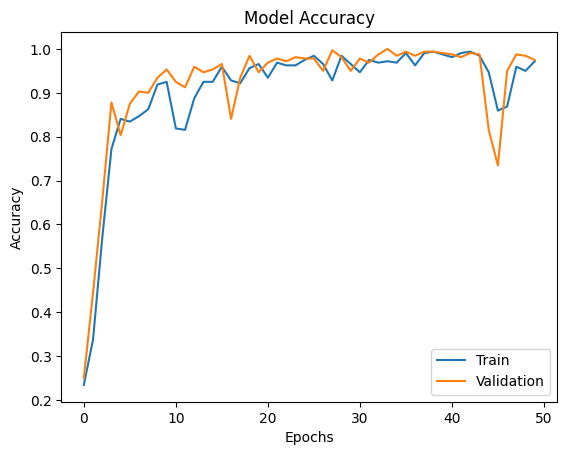

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
test="/content/drive/MyDrive/fingerprints/Test"
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['''Tình duyên: Người độc thân chớ vội yêu lầm ai, hãy tìm hiểu thật kĩ trước khi quyết định đến với nhau. 

Tài lộc: Tiền bạc chi tiêu thoải mái, đôi lúc tiêu tiền cho mua sắm online quá đà.

Sức khỏe: Nhìn màn hình máy tính quá lâu nên thư giãn, nghỉ ngơi cho mắt.''','DB1',
'''Công việc: Vận trình sự nghiệp có nhiều dự án thú vị, bạn lưu tâm nhiều, di chuyển công tác xa nhà. 

Tình duyên: Người tuổi Thìn quá lụy tình, khó buông bỏ được những mối tình đã chia xa. 

Tài lộc:Tiền tài tốn kém nhiều chi phí cho di chuyển công tác, tiền ăn uống phát sinh cho việc mời bạn bè. 

Sức khỏe: Đau lưng, mỏi gối vì di chuyển quá lâu trong thời gian dài.''','DB2','''Công việc: Công việc được gia đình đầu tư, khó khăn có gia đình giúp đỡ cùng bạn vượt qua trong giai đoạn khủng hoảng.  

Tình duyên: Tình cảm không có nhiều thay đổi lớn, giữa bạn và người ấy vẫn đang giữ trạng thái im lặng.  

Tài lộc: May mắn đến với bạn, được gia đình chu đáo sắm sửa cho nhiều món đồ.    

Sức khỏe: Chăm sóc bản thân bằng những thông tin chính thông, hữu ích tốt cho sức khỏe của bạn và gia đình.''','DB3','''

Công việc: Hôm nay công việc không tốn quá nhiều sức lực, thường xuyên có nhiều đổi mới, bạn bè giúp đỡ khi khó khăn. 

Tình duyên: Tình duyên của bạn và người ấy đồng điệu về tâm hồn, thấu hiểu khó khăn của nhau, không cần nói cũng hiểu được đối phương muốn điều gì. 

Tài lộc:  Tiền tài người tuổi Ngọ chưa có nhiều, lo toan chi phí mỗi ngày.

Sức khỏe: Cạn kiệt năng lượng bạn nên dành thời gian nghỉ ngơi, ngủ đủ.''','DB4']
  print(class_name[result])
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [1]:
import sys
sys.path.append("drive")
import os
os.chdir('drive/My Drive/Colab Notebooks')

In [2]:
! pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! conda install -c anaconda nbconvert
# convert KuraSiva2.ipynb to Latex:

/bin/bash: conda: command not found


In [4]:
! jupyter nbconvert --to latex fingerprints.ipynb

[NbConvertApp] Converting notebook fingerprints.ipynb to latex
[NbConvertApp] Support files will be in fingerprints_files/
[NbConvertApp] Making directory fingerprints_files
[NbConvertApp] Writing 50721 bytes to fingerprints.tex
